In [1]:
from graph_tool.all import *
import matplotlib.pyplot as plt
import pprint as pp
import json
import csv
import ast

In [2]:
members = []
followers = set([])
member_followers = {}
G = Graph()

with open('sweat16_followers_id.json') as f:
    for line in f.readlines():
        temp = ast.literal_eval(line)
        key = list(temp.keys())[0]
        value = list(temp.values())[0]
        
        members.append(key)
        member_followers[key] = value
        followers |= set(value)

In [3]:
def degree_centrality(G):
    centrality = {}
    s = 1.0 / (len(list(G.vertices())) - 1.0)
    centrality = {v: d * s 
                  for v, d in zip(G.vertices(), G.degree_property_map("in"))}
    return centrality

In [4]:
member_v = {}
follower_v = {}

for member in members:
    member_v[member] = G.add_vertex()
    
for follower in followers:
    follower_v[follower] = G.add_vertex()

In [5]:
for member in members:
    for follower in member_followers[member]:
        G.add_edge(follower_v[follower], member_v[member])

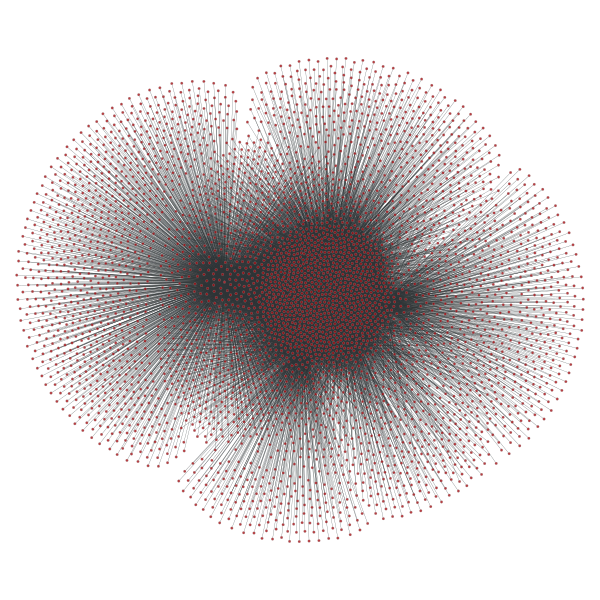

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f148531bfd0, at 0x7f14852ff550>

In [6]:
pos = sfdp_layout(G)
deg = G.degree_property_map("in")
graph_draw(G)

In [7]:
degree_centrality(G)

{<Vertex object with index '0' at 0x7f1484d3be70>: 0.2058011049723757,
 <Vertex object with index '1' at 0x7f1484d3bed0>: 0.2882136279926335,
 <Vertex object with index '2' at 0x7f1484d3bc90>: 0.255524861878453,
 <Vertex object with index '3' at 0x7f1484d3bdb0>: 0.26611418047882135,
 <Vertex object with index '4' at 0x7f1484d3be10>: 0.28406998158379376,
 <Vertex object with index '5' at 0x7f1484d3bf90>: 0.22030386740331492,
 <Vertex object with index '6' at 0x7f1484d400f0>: 0.6203959484346225,
 <Vertex object with index '7' at 0x7f1484d40390>: 0.3524401473296501,
 <Vertex object with index '8' at 0x7f1484d40210>: 0.3436924493554328,
 <Vertex object with index '9' at 0x7f1484d40270>: 0.343232044198895,
 <Vertex object with index '10' at 0x7f1484d403f0>: 0.35980662983425415,
 <Vertex object with index '11' at 0x7f1484d40330>: 0.25644567219152853,
 <Vertex object with index '12' at 0x7f1484d405d0>: 0.26749539594843463,
 <Vertex object with index '13' at 0x7f1484d40450>: 0.0,
 <Vertex obje

In [8]:
def freeman_cenrality(G):
    centrality = {}
    n = len(list(G.vertices()))
    max_d = max(list(G.degree_property_map("in")))
    s = 1.0 / ((n-1) * (n-2))
    centrality = {v: (max_d - d) * s 
                  for v, d in zip(G.vertices(), G.degree_property_map("in"))}
    
    return sum(centrality.values())

In [9]:
freeman_cenrality(G)

0.6197459958639064